In [4]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [7]:
# create some data
mean_01 = np.array([0., 0.])
cov_01 = np.array([[1.0, 1.2], [1.2, 1.5]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape
# print np.cov(data.T)

(800, 2)


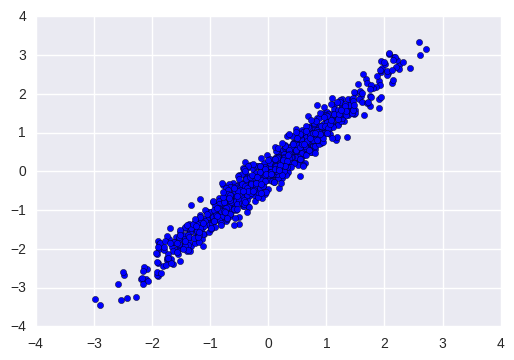

In [8]:
plt.figure(0)
sns.plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [10]:
def pca(X, k=None):
    # set number of output dims
    if k is None:
        k = X.shape[1]
    
    # compute the covariance
    A = np.cov(X.T)
    
    # Compute the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(A)
    #Z = X.dot(W)
    return eig_val, eig_vec

In [11]:
lam, W = pca(data)
print lam.shape, W.shape

(2,) (2, 2)


In [14]:
print lam
print W

[0.02614494 2.62713172]
[[-0.77814817 -0.62808075]
 [ 0.62808075 -0.77814817]]


In [18]:
print np.cov(data.T)

[[1.05219633 1.27120598]
 [1.27120598 1.60108034]]


In [ ]:
print lam
print W

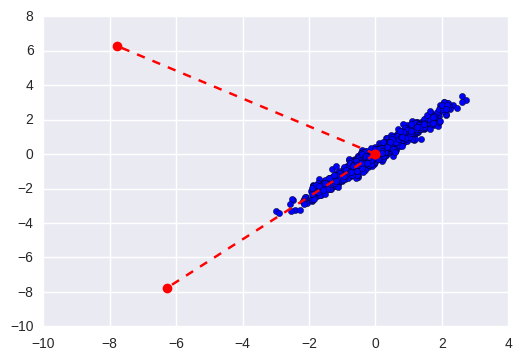

In [15]:
plt.figure(0)
sns.plt.scatter(data[:, 0], data[:, 1])
plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

In [16]:
Z = data.dot(W)
print Z.shape
print Z[:10]

(800, 2)
[[-0.1075952   3.478789  ]
 [-0.03029436  0.744819  ]
 [-0.11919944  0.22404867]
 [ 0.33727762  2.59066262]
 [ 0.111015   -0.46033644]
 [-0.04400042 -1.5136162 ]
 [ 0.09925017 -3.21165772]
 [-0.2166104   0.95878966]
 [ 0.08874375  1.0150797 ]
 [-0.15838155 -0.10064358]]


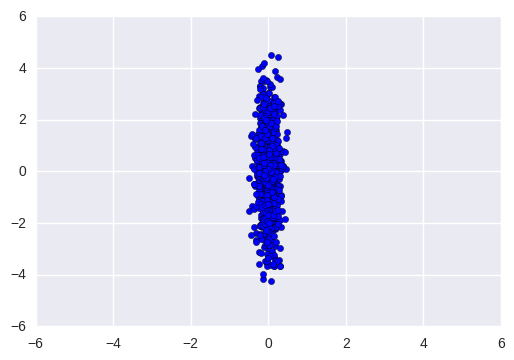

In [17]:
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
sns.plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

In [23]:
sigma = np.cov(Z.T)
print W.dot(sigma).dot(W.T)

[[1.05219633 1.27120598]
 [1.27120598 1.60108034]]


(800, 2)


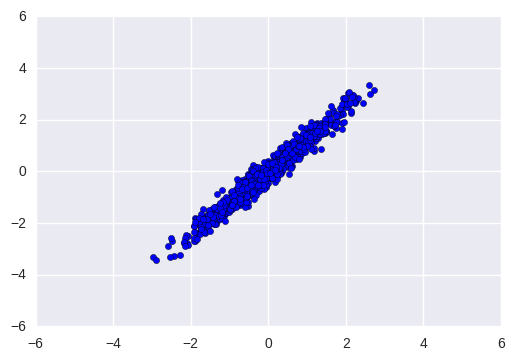

In [26]:
# Reconstructing the original data
D = Z.dot(W.T)
print D.shape

plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
sns.plt.scatter(D[:, 0], D[:, 1])
plt.show()

In [27]:
print np.cumsum(lam[::-1]/lam.sum())

[0.99014617 1.        ]


# PCA on MNIST

In [6]:
ds = pd.read_csv('/Users/adityakumar/Desktop/ML/train.csv')
data = ds.values[:10000, 1:]
y = ds.values[:10000, 0]
print(data.shape)

(10000, 784)


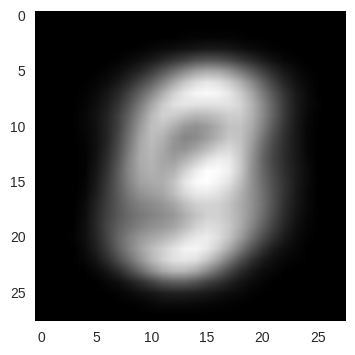

In [36]:
N = 1200
plt.grid("off")
plt.imshow(data[:].mean(axis=0).astype(np.uint8).reshape((28, 28)), cmap='gray')

In [37]:
A = np.cov(data.T)
print A.shape

(784, 784)


In [38]:
eig_vals, eig_vecs = np.linalg.eig(A)
print eig_vals.shape

(784,)


In [39]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
print len(info)

784


In [40]:
info = sorted(info, key=lambda z: z[0], reverse=True)

In [41]:
sorted_lambda = []
sorted_W = []

for ix in range(len(info)):
    sorted_lambda.append(info[ix][0])
    sorted_W.append(info[ix][1])

sorted_lambda = np.asarray(sorted_lambda)
sorted_W = np.asarray(sorted_W)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


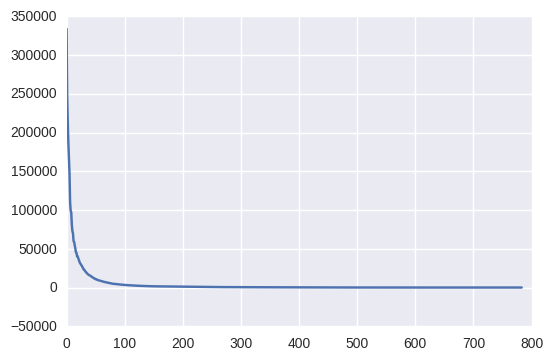

In [42]:
plt.plot(sorted_lambda)

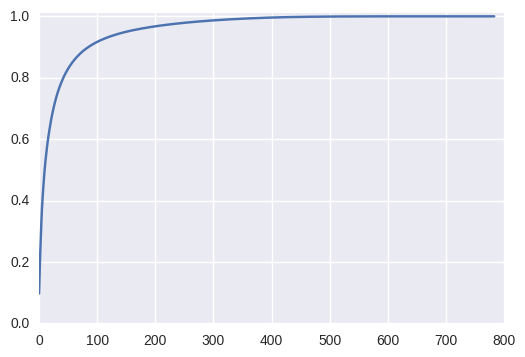

In [43]:
plt.figure(0)
plt.ylim(0, 1.01)
plt.plot(np.cumsum(sorted_lambda/sorted_lambda.sum()))
plt.show()

In [84]:
explained_variances_ratio = np.cumsum(sorted_lambda/sorted_lambda.sum())
print explained_variances_ratio[50]

(0.8297100213499969+0j)


In [48]:
for ix in range(explained_variances_ratio.shape[0]):
    if explained_variances_ratio[ix] < 0.99:
        pass
    else:
        print ix
        break

326


In [56]:
k = 500
W = sorted_W[:, :k]
Z = data.dot(W)
print Z.shape

(10000, 500)


101.1240338010204

(10000, 784)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


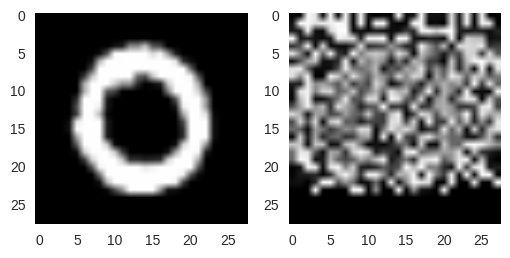

In [66]:
X_reconstruct = Z.dot(W.T).astype(np.uint8)
X_pos = (X_reconstruct>0)
X_new = X_reconstruct * X_pos

print X_reconstruct.shape

# print np.asarray(X_reconstruct[0], dtype='uint8')
N = 1

plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(data[N].astype(np.uint8).reshape((28, 28)), cmap='gray')
plt.subplot(1, 2, 2)
plt.grid("off")
plt.imshow(X_new[N].astype(np.uint8).reshape((28, 28)), cmap='gray')

In [1]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

X_ = pca.fit_transform(data)
print(X_.shape)

(10000, 2)


In [115]:
X_re = pca.inverse_transform(X_)
X_re.shape

(10000, 784)

267.1193364779676


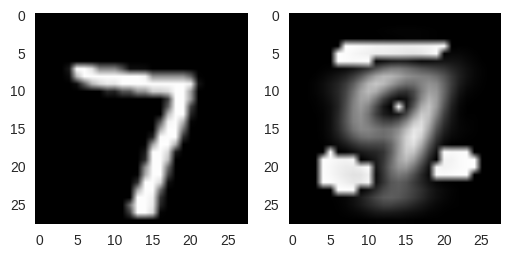

In [116]:
N = np.random.randint(0, high=10000)
plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(data[N].reshape((28, 28)), cmap='gray')

plt.subplot(1, 2, 2)
plt.grid("off")

im = X_re[N]
img = im - im.min()
print img.max()
img = img

plt.imshow(im.astype(np.uint8).reshape((28, 28)), cmap='gray')

plt.show()

In [118]:
X_re.shape

(10000, 784)

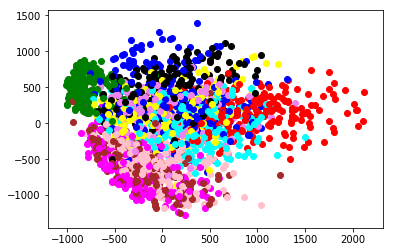

In [10]:
colors = ['red', 'green', 'blue', 'black', 'pink', 'yellow', 'cyan', 'magenta', 'violet', 'brown', 'orange']
plt.figure(0)
for ix in range(2000):
    plt.scatter(X_[ix, 0], X_[ix, 1], color=colors[y[ix]])
plt.show()